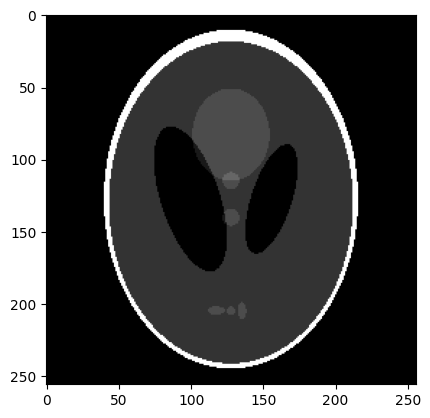

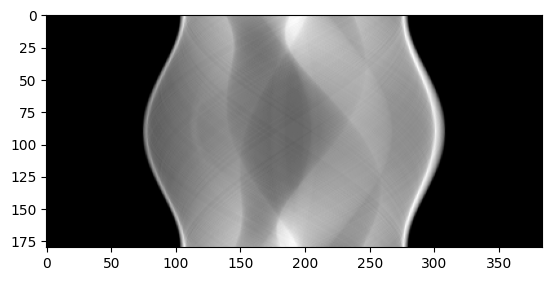

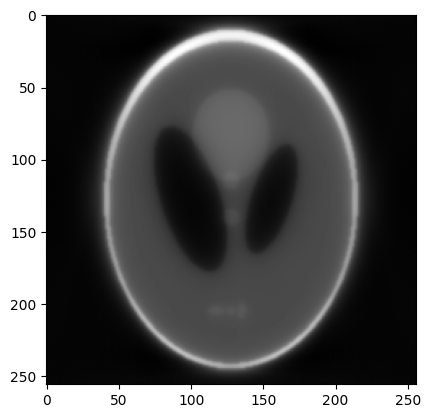

In [4]:

import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)
proj_geom = astra.create_proj_geom('parallel', 1.0, 384, np.linspace(0,np.pi,180,False))

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip', proj_geom, vol_geom)

# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)

import pylab
pylab.gray()
pylab.figure(1)
pylab.imshow(P)
pylab.figure(2)
pylab.imshow(sinogram)

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

#id = astra_create_backprojection(data, projector_id);

tmp1, tmp = astra.create_backprojection(sinogram, proj_id);

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure(3)
pylab.imshow(rec)
pylab.show()

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

In [5]:
tmp1

13

In [10]:
import matplotlib.pyplot as plt

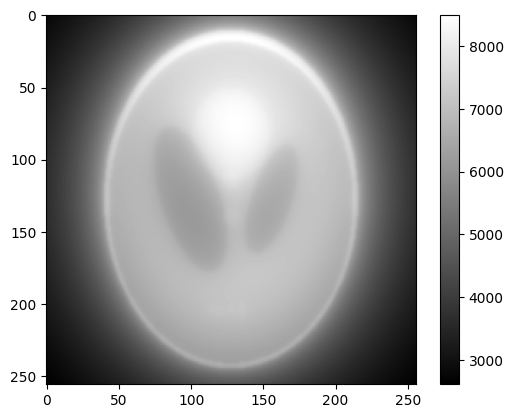

In [13]:
plt.imshow(tmp)
plt.colorbar()
plt.show()

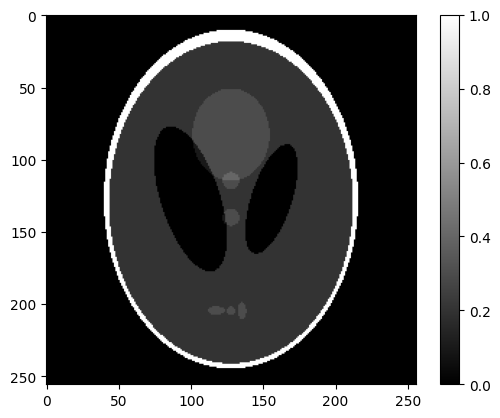

In [14]:
plt.imshow(P)
plt.colorbar()
plt.show()

In [16]:
scipy.io.loadmat('htc2022_ta_full.mat')["CtDataFull"]

array([[(array(['2d'], dtype='<U2'), array([[0.00703797, 0.00653538, 0.00459431, ..., 0.01029425, 0.00905091,
                0.00519634],
               [0.02399684, 0.01039073, 0.00924845, ..., 0.01372438, 0.01477052,
                0.01002101],
               [0.00724622, 0.01474747, 0.01003154, ..., 0.01518648, 0.00905747,
                0.00989717],
               ...,
               [0.01930252, 0.01700024, 0.01198037, ..., 0.00903341, 0.00999271,
                0.00906649],
               [0.01308718, 0.00471785, 0.01375181, ..., 0.01638131, 0.01484934,
                0.00980387],
               [0.01715776, 0.01722446, 0.00885762, ..., 0.01705778, 0.01865915,
                0.01449423]]), array([[(array(['htc2022_ta_'], dtype='<U11'), array(['University of Helsinki Industrial Mathematics Computed Tomography Laboratory'],
                      dtype='<U76'), array(['Alexander Meaney, Tommi Heikkilä'], dtype='<U32'), array(['20220616'], dtype='<U8'), array(['YYYYMMDD'], dtyp

In [ ]:
# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)